In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from matplotlib          import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import IFrame, display
import math

(array([1., 0., 0., 2., 0., 1., 3., 0., 1., 2.]),
 array([-5.84192597, -4.5755447 , -3.30916343, -2.04278216, -0.77640089,
         0.48998039,  1.75636166,  3.02274293,  4.2891242 ,  5.55550548,
         6.82188675]),
 <a list of 10 Patch objects>)

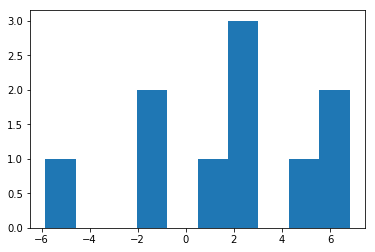

In [2]:
Data = np.loadtxt('../data/dataMLikelihood.dat')
plt.hist(Data)

In [3]:
def LogProb(x, mu, sigma):
    l =  ( 1./np.sqrt(2.* np.pi * sigma**2) )*np.exp( -0.5*((x - mu)/sigma)**2 )
    return np.log(l)

In [12]:
def LogLikelihood(x, Npoints=30):
    a = np.linspace(-2, 5, Npoints)
    b = np.linspace(1, 8, Npoints)
    MU, SIGMA = np.meshgrid(a, b)
    
    likelihood = np.zeros( (Npoints, Npoints) )
    
    for i in x:
        likelihood += LogProb(i, MU, SIGMA)
        
    return MU, SIGMA, likelihood

In [13]:
MU, SIGMA, Likelihood = LogLikelihood(Data, 300)

Text(0,0.5,'$\\sigma$')

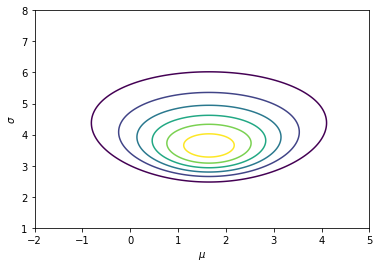

In [14]:
plt.contour(MU, SIGMA, np.exp(Likelihood-Likelihood.max()))
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")
#plt.savefig('LikelihoodContour.pdf')